## Observations and Insights

## Dependencies and starter code

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as pyplt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
mouse_and_study_df = mouse_metadata_df.merge(study_results_df, how='outer', left_on='Mouse ID', right_on='Mouse ID', 
                     suffixes=('_mouse', '_study'))
mouse_and_study_df = mouse_and_study_df.dropna(how='any')
print(study_results_df.shape)
print(mouse_metadata_df.shape)
print(mouse_and_study_df.shape)
# mouse_and_study_df.to_csv(r'data/mouse_and_study_results.csv')

mouse_and_study_df.head()


(1893, 4)
(249, 5)
(1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
k403_1 = study_results_df.loc[(study_results_df["Mouse ID"] == "k403")]
k403_2 = mouse_metadata_df.loc[(study_results_df["Mouse ID"] == "k403")]
k403_3 = mouse_and_study_df.loc[(study_results_df["Mouse ID"] == "k403")]
print(k403_1.size)
print(k403_2.size)
print(k403_3.size)
temp = pd.DataFrame({"A":mouse_and_study_df["Drug Regimen"]})
print(temp.A.unique())

# temp = pd.DataFrame({"A":mouse_and_study_df["Mouse ID"]})
# print(temp.A.unique())

40
5
80
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


## Summary statistics

In [5]:
# Generate a summary statistics table of 
# mean-,
# median, 
# variance, 
# standard deviation, and
# SEM of the tumor volume for each regimen
mouse_and_study_df.describe(include="all")


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893,1893,1893,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
unique,249,10,2,NaN,NaN,NaN,NaN,NaN
top,g989,Capomulin,Male,NaN,NaN,NaN,NaN,NaN
freq,13,230,958,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.814580,25.662441,19.572108,50.448381,1.021659
std,NaN,NaN,NaN,7.189592,3.921622,14.079460,8.894722,1.137974
min,NaN,NaN,NaN,1.000000,15.000000,0.000000,22.050126,0.000000
25%,NaN,NaN,NaN,7.000000,25.000000,5.000000,45.000000,0.000000
50%,NaN,NaN,NaN,13.000000,27.000000,20.000000,48.951474,1.000000
75%,NaN,NaN,NaN,20.000000,29.000000,30.000000,56.292200,2.000000


In [6]:
mouse_and_study_df.sem()

Age_months            0.165245
Weight (g)            0.090134
Timepoint             0.323602
Tumor Volume (mm3)    0.204436
Metastatic Sites      0.026155
dtype: float64

In [7]:
mouse_and_study_df.median()

Age_months            13.000000
Weight (g)            27.000000
Timepoint             20.000000
Tumor Volume (mm3)    48.951474
Metastatic Sites       1.000000
dtype: float64

In [8]:
mouse_and_study_df.var()

Age_months             51.690231
Weight (g)             15.379122
Timepoint             198.231188
Tumor Volume (mm3)     79.116074
Metastatic Sites        1.294985
dtype: float64

In [9]:
drug_regiment = mouse_and_study_df["Drug Regimen"].unique()
drug_regiment

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# Age_months 
mouse_and_study_age_df = pd.DataFrame(
    {"DR":mouse_and_study_df["Drug Regimen"], "Age":mouse_and_study_df["Age_months"]}
)

dr_age_gb = mouse_and_study_age_df.groupby(["DR"])
dr_age_mean_df = dr_age_gb.mean()

In [11]:
# Weight (g) 
mouse_and_study_weight_df = pd.DataFrame(
    {"DR":mouse_and_study_df["Drug Regimen"], "Weight":mouse_and_study_df["Weight (g)"]}
)

dr_weight_gb = mouse_and_study_weight_df.groupby(["DR"])
dr_weight_mean_df = dr_weight_gb.mean()

In [12]:
# Timepoint 
mouse_and_study_timepoint_df = pd.DataFrame(
    {"DR":mouse_and_study_df["Drug Regimen"], "Timepoint":mouse_and_study_df["Timepoint"]}
)

dr_timepoint_gb = mouse_and_study_timepoint_df.groupby(["DR"])
dr_timepoint_mean_df = dr_timepoint_gb.mean()

In [13]:
# volume 
mouse_and_study_volume_df = pd.DataFrame(
    {"DR":mouse_and_study_df["Drug Regimen"], "Volume":mouse_and_study_df["Tumor Volume (mm3)"]}
)

dr_volume_gb = mouse_and_study_volume_df.groupby(["DR"])
dr_volume_mean_df = dr_volume_gb.mean()


In [17]:
# Metastatic Sites 
mouse_and_study_metastatic_df = pd.DataFrame(
    {"DR":mouse_and_study_df["Drug Regimen"], "Metastatic":mouse_and_study_df["Metastatic Sites"]}
)

dr_metastatic_gb = mouse_and_study_metastatic_df.groupby(["DR"])
dr_metastatic_mean_df = dr_metastatic_gb.mean()

## Bar plots

In [48]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ind = np.arange(drug_regiment.size) 
dr_volume_mean_df = dr_volume_mean_df.reset_index()
dr_age_mean_df.plot(ind, dr_volume_mean_df["Volume"], kind='bar')


ValueError: cannot insert level_0, already exists

In [42]:
dr_age_mean_df.columns

Index(['Age'], dtype='object')

<BarContainer object of 10 artists>

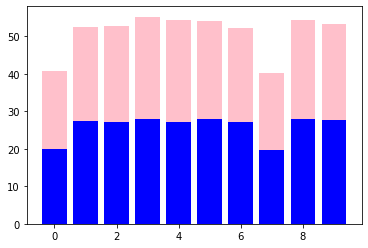

In [39]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

ind = np.arange(drug_regiment.size) 
pyplt.bar(ind, dr_age_mean_df["Age"], color="red")
pyplt.bar(ind, dr_timepoint_mean_df["Timepoint"], color="purple")
pyplt.bar(ind, dr_metastatic_mean_df["Metastatic"], color="orange")
pyplt.bar(ind, dr_volume_mean_df["Volume"], color="Pink")
pyplt.bar(ind, dr_weight_mean_df["Weight"], color="blue")



# pyplt.plot(drug_regiment, dr_timepoint_mean_df, color="purple")
# pyplt.plot(drug_regiment, dr_metastatic_mean_df, color="orange")
# pyplt.plot(drug_regiment, dr_volume_mean_df, color="Pink")
# pyplt.plot(drug_regiment, dr_weight_mean_df, color="blue")

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume 
# for the Capomulin regimen